# <center> Workshop Séquence 5 <center> Bases du Traitement du Signal

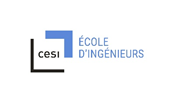
    
**Auteur : ANCE**

**Relecture : GDS**
    
<font color=red>**Version Tuteur__05/21__ CPI A1**

## INTRODUCTION

Dans ce workshop, nous allons nous familiariser avec les bases du traitement du signal. Le traitement du signal est une discipline qui trouve ses racines dans les travaux de [Joseph Fourier](https://fr.wikipedia.org/wiki/Joseph_Fourier), scientifique du siècle des lumières. Il a montré qu’il était possible d’exprimer une fonction (signal) comme la somme de plusieurs sinusoïdes (spectre). Cette décomposition est particulièrement utilisée lorsqu’il s’agit d’analyser des ondes. 

La numérisation d'un signal consiste à transformer un signal analogique (continu) qui contient une quantité infinie d'amplitudes en un signal numérique (discret) contenant, lui, une quantité finie de valeurs. Le passage de l'analogique au numérique repose sur trois étapes successives : l'échantillonnage, la quantification, et le codage.

Nous abordons dans ce workshop les trois parties suivantes:

1. **Echantillonnage et quantification d’un signal.**

2. **Principe de la Transformée de Fourier.**

3. **Filtrage numérique par la Transformée de Fourier.**


## 1. Echantillonnage et quantification d’un signal
### 1.1 Théorème d'échantillonnage


Un signal sinusoïdal est un signal continu défini par une équation temporelle :  $signal(t)=A sin (2πf t + \phi)$ .

$A$ : amplitude du signal.

$f$ : fréquence du signal.

$t$ : temps.

$\phi$ : phase du signal.

$\omega = 2πf t$ : pulsation du signal.

On souhaite générer en python un signal sinusoïdal pour une durée $D=1$ seconde ayant comme paramètres :  
- $A=1$,
- $\phi$  = $\pi$,
- $f$= $5 Hz$,
- $Fe$ = $1000 Hz$ qui représente la fréquence d'échantillonnage (nombre d’échantillons par seconde)


#### **Q1) Compléter et exécuter le `code python 1`ci-dessous pour générer le signal $signal(t)$**.

#### **<font color=red>Réponse : $t=np.arange(0,D,1/Fe)$ à ajouter puis exécuter dans le code python 1 </font>**



**`code python 1`**


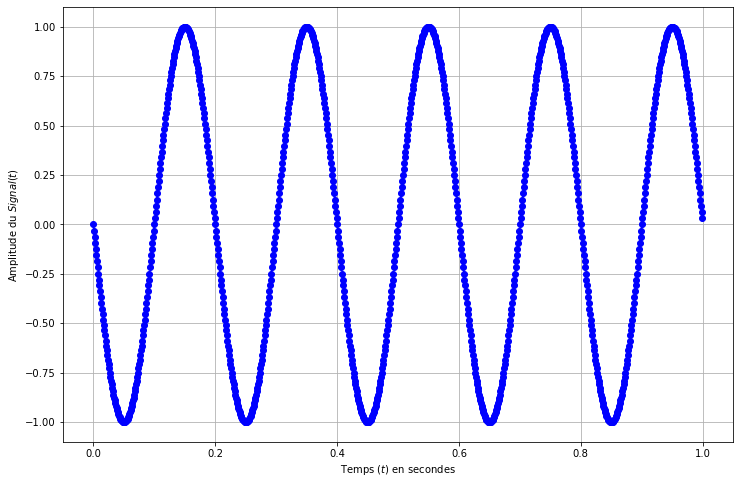

In [1]:
# Importer les bibliothèques Python nécessaires

import numpy as np
import matplotlib.pyplot as plt

# Variables d'initialisation du signal

A = 1                # Amplitude
phi = np.pi          # Phase
f = 5                # Fréquence du signal
Fe = 1000            # Fréquence d'échantillonage
D = 1                # Durée du signal qui sera utilisée pour générer le vecteur temps t.

#--------------------- Patie du code à compléter (vecteur temps)-----------------------------------------

## Astuce : utiliser la fonction arange de numpy en prenant un pas de 1/Fe

t = np.arange(0,D,1/Fe)

#------------------------------------------------------------------------------------------------------


# Le signal généré

signal = A*np.sin(2*np.pi*f*t+phi)

plt.figure(figsize=(12,8))  # créer une figure de taille 12cm x 8cm

# Tracé du signal

plt.plot(t, signal, 'ob--')

# Ajouter une grille et les noms des axes

plt.grid()
plt.xlabel("Temps $(t)$ en secondes")
plt.ylabel("Amplitude du $Signal(t)$")

# Affichage du graphe

plt.show()


####  **Q2) Que représente $Fe$ dans le `code python 1` ? Est-ce que le signal représenté est continu ou discret ?**


#### <font color=red>Réponse : $Fe$ représente la fréquence d’échantillonnage du signal $S(t)$ (Fe = 1000 points/s (Hz) dans le code). Le signal apparaît continu mais en réalité il est discret, c'est juste que la fréquence $Fe$ est suffisamment grande pour qu'il nous semble presque continu.</font>



####  **Q3) Changer la valeur $Fe$ dans le `code python 1` par les valeurs suivantes : $Fe = 100 Hz$, $Fe = 50 Hz$, $Fe = 10 Hz$,  $Fe = 5 Hz$ et exécuter le `code python 1` pour chacune de ces valeurs. Que constatez-vous ? Existe-t-il une valeur limite de $Fe$ pour visualiser une courbe correcte du signal $signal(t)$ ?**

####  <font color=red>Réponse : Quand on change la valeur de $Fe$ ($100$, $50$, $10$, $5Hz$), la qualité du signal se dégrade pour des valeurs de $Fe$ inférieures à $2\times f = 10Hz$ ($f = 5Hz$ étant la fréquence du signal). Dans ce cas le Théorème de Shannon-Nyquist n’est pas vérifié et le nombre d'échantillons du signal est insuffisant pour le représenter convenablement et ne pas perdre d'information essentielle.</font>

####  **Q4) Enoncer le Théorème de Shannon-Nyquist et en tirer des conclusions sur les résultats de la question Q3.**

#### <font color=red>Réponse : La fréquence d’échantillonnage $Fe$ d’un signal doit être supérieure ou au minimum égale au double de la fréquence du signal $f$ à échantillonner, ce qu'on peut aussi écrire $Fe\ge 2\times f$. Dans notre cas  $f = 5Hz$ donc on doit avoir $Fe\ge 10$.</font>



### 1.2 Echantillonnage d'un signal audio
Pour la suite de ce workshop nous aurons besoin des bibliothèques `soundfile` et `sounddevice`. Ces deux bibliothèques permettent de lire et écrire des fichiers audio avec différents formats, et de gérer les entrées sorties audio (par exemple effectuer un enregistrement à travers le microphone de votre PC).

Pour ajouter un package en python vous pouvez suivre l'approche classique d'ajout d’un package sur anaconda, les étapes sont déjà décrites en détail dans la corbeille d’exercices de la séquence 3. Vous pouvez aussi voir un exemple ici : [comment ajouter un package avec anaconda ?](https://datatofish.com/how-to-install-python-package-in-anaconda/).

Une autre façon rapide pour ajouter un package en local (uniquement utilisable dans le document Jupyter en cours) est d'utiliser la commande `%pip install  nom_du_package`. Vous pouvez exécuter le code suivant:


#### Ajouter les bibliothèques `soundfile` et `sounddevice`

In [ ]:
%pip install soundfile
%pip install sounddevice


### 1.3 Influence de la fréquence d'échantillonnage sur une mélodie
Dans cette partie du workshop, on souhaite lire et jouer une mélodie à des fréquences d'échantillonnage différentes. La valeur par défaut utilisée pour l'échantillonnage du fichier audio ($Melody1.wav$) lors de son enregistrement est $Fe = 44100Hz$.

#### **Q5) Expliquer pourquoi on utilise dans ce workshop une fréquence d'échantillonnage par défaut $Fe = 44100Hz$ ?**

#### **<font color=red>Réponse : L'oreille humaine entend des fréquences comprises entre $20Hz$ (fréquence la plus grave) et $20000Hz$ (fréquence la plus aiguë). Pour respecter le Théorème de Shannon-Nyquist, la fréquence minimale doit être $2\times20000 Hz$, soit $40 KHz$ ~ $44100 Hz$. A noter que la fréquence de $44100Hz$ est la fréquence d'échantillonnage standardisée utilisée pour encoder l'information sur par exemple un CD du commerce. Plus di'nformation sur le choix de ce standard sont disponibles [ici](https://en.wikipedia.org/wiki/44,100_Hz).</font>**


#### **Q6) La voix humaine est comprise dans une bande de fréquence entre $100 Hz$ et $3400 Hz$. Quelle fréquence minimale d’échantillonnage doit-on choisir pour effectuer une communication téléphonique ?**

#### **<font color=red>Réponse : Pareil que la réponse de la Q5) $Fe \ge 2\times3400 = 6800 Hz$. Dans la pratique les opérateurs téléphoniques utilisent $8KHz$.</font>**



Exécuter le **`code python 2:`** suivant :

In [3]:
# Importer soundedevice et soundfile

import sounddevice as sd
import soundfile as sf

# Fichier de la mélodie

filename = 'Melody1.wav'

# Lecture de la mélodie avec la fonction read de la bibliothèque soundfile
# Cette fonction renvoie data : données du fichier .wav et Fe : fréquence d'échantillonnage utilisée en enregistrement.

data, Fe = sf.read(filename)

# Afficher quelques inforamtions du fichier audio (Fe, nombre d'échantillons et sa taille)

print('-------------------Informations utiles sur le fichier audio---------')
print('1. La mélodie est une matrice de taille :', data.shape)
print('2. la fréquence d échantillonnage de la mélodie est :', Fe, 'Hz') 
print('3. Le nombre d échantillons de la mélodie est :', len(data))
print('------------------------------Fin------------------------------------')

# Cette commande permet de jouer la mélodie

sd.play(data, Fe)
status = sd.wait()  # attendre la fin de la mélodie


-------------------Informations utiles sur le fichier audio---------
1. La mélodie est une matrice de taille : (237312, 2)
2. la fréquence d échantillonnage de la mélodie est : 44100 Hz
3. Le nombre d échantillons de la mélodie est : 237312
------------------------------Fin------------------------------------


####  **Q7) Que représente le chiffre 2 de la matrice (237312, 2) renvoyé par la commande data.shape ?**

#### **<font color=red>Réponse : Le 2 de la matrice (237312, 2) signifie que la mélodie est enregistrée en stéréo (2 canaux) et non en mono. Un signal stéréo est le résultat de l’enregistrement et de l’assemblage de deux signaux mono, visant à reconstituer la répartition du son dans l’espace sonore. Pour capturer ces deux signaux, deux micros seront utilisés afin de capter simultanément la même source sonore. (source : Wikipédia)</font>**


#### **Q8) En utilisant la fréquence d'échantillonnage $Fe$ et le nombre d'échantillons du fichier, déduire la durée de cette mélodie.**
    
 <font color=red>**Duree_melody = Nombre d'échantillons(data) / Fe = 237312 / 44100 = 5,38 secondes. Le résultat est affiché aussi dans le code python 3. Pour calculer le nombre d'échantillons d'un vecteur sur python (matrice data dans notre cas) on utilise la commande python `len(data)`.</font>**


#### **Q9) Maintenant que vous avez calculé la durée de la mélodie, complétez le `code python 3` pour représenter graphiquement la première colonne de la matrice data qui contient les données de la mélodie en fonction du temps.**

####  <font color=red>Réponse :</font>

```python
Duree_melody = len(data)/Fe
t_melody = np.arange(0,Duree_melody,1/Fe)
plt.plot(t_melody, data[:,0]) #tracer le premier canal seulement
```


**Astuces :** 

Pour récupérer la première dimension d'une matrice de $m$ lignes et $n$ colonnes $A[m,n]$, on utilise $A[:, 0]$.

Les ($:$) permettent de sélectionner toutes les lignes, le ($0$) permet de ne récupérer que la première colonne.

**`code python 3 :`**

La mélodie a une durée de : 5.381224489795918 secondes


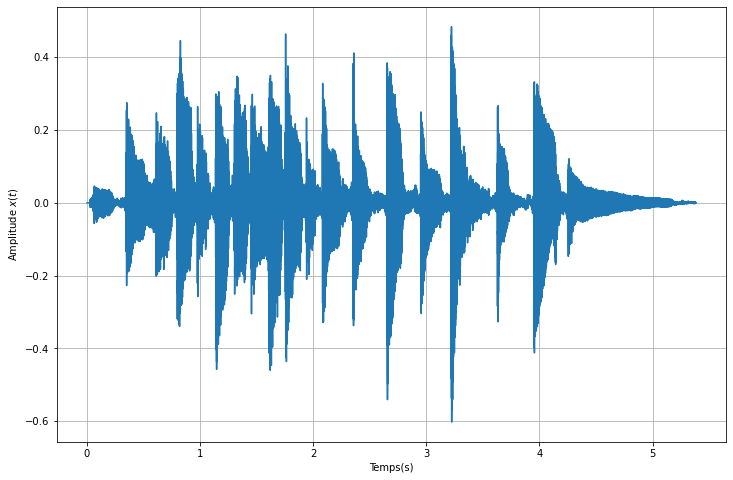

In [17]:
# Calcul de la durée de la mélodie 

Duree_melody = len(data)/Fe

print('La mélodie a une durée de :', Duree_melody, 'secondes')

# Génération du vecteur temps

t_melody = np.arange(0,Duree_melody,1/Fe)

plt.figure(figsize=(12,8))  # Créer une figure de taille 12cm x 8cm

# Tracer les données

plt.plot(t_melody, data[:,0])

# Ajout de la grille et des noms des axes

plt.grid()
plt.xlabel("Temps(s)")
plt.ylabel("Amplitude $x(t)$")
plt.show()


#### **Q10) Dans le `code python 4 ` suivant, changer la valeur de $Fec$ pour qu'elle prenne les valeurs suivantes : $Fe/2$ , $Fe/4$, $Fe/8$, $Fe/16$ (sachant qu'on a toujours $Fe = 44100 Hz$), puis rejouer à chaque fois la mélodie en exécutant le code python. Que constatez-vous ?**


#### **<font color=red>Réponse : Quand on change la valeur de $Fec = {Fe/2, Fe/4, Fe/8, Fe/16}$, la qualité de la mélodie se dégrade car le théorème de Shannon-Nyquist n’est pas respecté.</font>**

**`code python 4 :`**

In [4]:
from scipy import signal
import numpy as np

# Calcul de la durée de la mélodie

Duree_melody = len(data)/Fe

#---------- Fec à changer-----
Fec = 44100        # puis  22050  puis  11025  puis  5512  puis  2756
#---------------------------

Nbre_echan = round(Fec*Duree_melody)

# On utilise la fonction signal.resample() qui permet d'échantillonner un signal donné

data_echantillonne = signal.resample(data, Nbre_echan)

# Jouer la mélodie

sd.play(data_echantillonne, Fec)    
status = sd.wait()    # Attendre la fin de la mélodie



### 1.4 Quantification d'un signal

#### Q9) Lors du projet Strongbox 3000, vous avez manipulé une carte Arduino comprenant un convertisseur analogique numérique (CAN).
#### a) Quel est le nombre de valeurs que peut prendre une mesure de tension analogique numérisée et affichée par une carte Arduino ? Cela correspond à un codage sur combien de bits ? En déduire le pas de quantification du CNA de la carte Arduino sachant que la valeur maximale de la tension mesurée est de 5V et la valeur minimale est de 0V.
#### b) Par analogie à l’exemple de l’Arduino, pouvez-vous donner le principe de la quantification d'un signal analogique de manière générale ? A quoi correspond un pas de quantification ? Quelle est son influence sur le signal enregistré ?


#### **<font color=red> Réponse :</font>**
#### **<font color=red> a) Le nombre affiché par la carte Arduino varie entre 0 et 1023, ce qui correspond à un nombre total de 1024 possibilités : la résolution est donc de 10 bits car $2^{10}$ = 1024. Connaissant le calibre du CAN (valeur max - valeur min) qui est de ($5V - 0V = 5V$), on peut en déduire le pas $p$ du CAN : $p = 5/1023 = 4.89mV$, soit environ $0,005V$.</font>**

#### **<font color=red> b) En traitement du signal, la quantification est le procédé qui permet d'approcher un signal continu par les valeurs d'un ensemble discret d'assez petite taille. La quantification correspondant à des niveaux discrets, il en résulte une perte d'information, pour peu que l'on puisse mesurer des variations inférieures aux longueurs d'intervalle de quantification avec des moyens analogiques. Le signal quantifié est en général un signal électrique, avec un convertisseur analogique-numérique — s'il est d'une autre nature, on le transforme en signal électrique, avec un transducteur. Appelons $ΔV$ l'amplitude maximale du signal en tension, et $δV$ la plus petite variation du signal numérisé, le pas de discrétisation. La quantification est une opération destructrice d'information qui introduit une erreur (ou un bruit) entre le signal quantifié et le signal source. Dans le cas d'une quantification uniforme, si l'on a $N$ seuils, on a alors :</font>**

#### **<font color=red>${\displaystyle \delta V={\frac {\Delta V}{N-1}}.}$</font>**

#### **<font color=red>En général, N est grand pour que la quantification soit « fine », on peut donc écrire :</font>**

#### **<font color=red>${\displaystyle \delta V\simeq {\frac {\Delta V}{N}}.}$</font>**
    
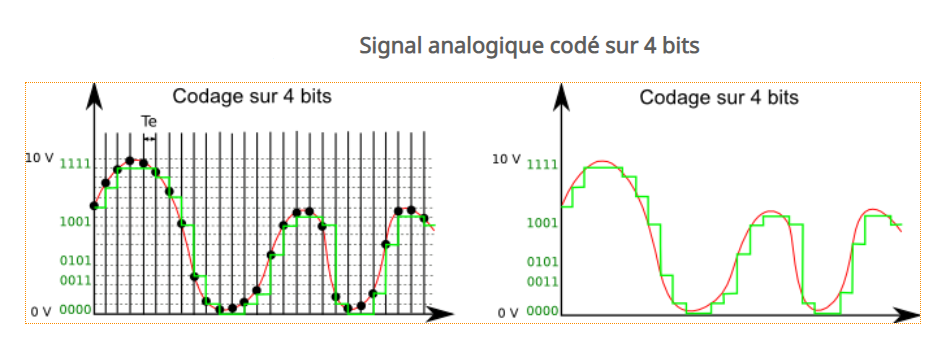

####  **<font color=red>Exemple pour $2^{4} = 16$ valeurs possibles et pour $2^{24} = 16777216$ valeurs possibles. Lorsque l’on réduit la quantification le son est de moins bonne qualité et l'erreur de quantification augmente.</font>**


####  **Q10) Pour montrer l'influence de la quantification sur la mélodie enregitrée dans le `code Python 2`, nous allons appliquer les étapes suivantes sur le `code python 2 bis` :**

1) Récupérer la matrice des données de la mélodie $data$ et la copier dans une autre variable nommée $data1$.

2) Afficher 5 valeurs de la matrice $data$, de la $1000 ^{ème}$ à la $1004 ^{ème}$ et constater le nombre de chiffres affichés après la virgule.

3) Afficher les valeurs maximale et minimale de $data$. 

4) Arrondir les valeurs de $data1$ à 4 chiffres après la virgule et répéter les étape 2 et 3 et comparer avec les valeurs obtenus pour la matrice $data$.

5) Ecouter la mélodie correspondant à $data$ puis celle correspondant à $data1$ (après arrondi). Que constatez-vous ?

6) Répéter l'étape 4 en arrondissant à 3 chiffres (puis 2 chiffres et enfin 1 chiffre après la virgule) et donner des conclusions sur la qualité de la mélodie après l’arrondi.

**Astuces :** 

1) Pour récupérer la première dimension d'une matrice de $m$ lignes et $n$ colonnes $A[m,n]$, on fait $A[:, 0]$. Les ($:$) permettent de sélectionner toutes les lignes, le ($0$) permet de ne récupérer que la première colonne. Pour récupérer un nombre donné de lignes on fait par exemple $Monvecteur[0:9]$ pour obtenir les 10 premières valeurs.

2) Utiliser la commande [`numpy.round()`](https://numpy.org/doc/stable/reference/generated/numpy.around.html
) pour arrondir à un nombre donné de chiffres après la virgule.


####  **<font color=red> Réponse : Voir le `code python 2 bis` pour le détail des commandes. Les conclusions sont claires par rapport à la dégradation de la qualité de la mélodie en passant de 8 chiffres après la virgules (signal initial) à 1 chiffre après la virgule avec l’arrondi (le pire des cas). A 2 chiffres après la virgule on entend encore beaucoup de bruit, à 3 chiffres un peu de bruit, et à 4 chiffres après la virgule on entend quasiment aucun artefact. La quantification influence fortement la qualité du signal, un équilibre est donc à trouver entre la taille du fichier à stocker en mémoire et la perte de l'information que l'on souhaite tolérer.</font>**

####  **Q11) Avec une quantification de 16 bits, de combien de valeurs dispose-t-on pour traduire l’amplitude du signal dans chaque échantillon ?**

#### **<font color=red>Réponse : $2^{16}$ = 65 536 valeurs possibles</font>**


####  **Q12) Entre une quantification de 24 bits et une de 4 bits, laquelle permettra de bien faire la distinction entre deux sons d’intensités sonores très proches et pourquoi ?**

#### **<font color=red>Réponse : Celles à 24 bits, puisque si les sons sont très proches, une quantification à seulement 4 bits sera susceptible de leur attribuer la même valeur.</font>**   

**`code python 2 bis`**

In [5]:
# Vous pouvez ne pas reprendre cette partie du code puisque il est déja exécuté plus haut et la variable data est décalarée
##########################################################################################################

# Fichier de la mélodie

filename = 'Melody1.wav'

# Lecture de la mélodie avec la fonction read de la bibliothèque soundfile
# Cette fonction renvoie data : données du fichier .wav et Fe : fréquence d'échantillonnage utilisée en enregistrement.

data, Fe = sf.read(filename)

################################################################################################################

# 1) Récupérer la matrice de données de la mélodie data et la copier dans une autre variable nommée data1.

data1 = data

# 2) Afficher 5 valeurs de la matrice data, de la 1000e à la 1004e et constater le nombre de chiffres affichés après la virgule.
# 3) Afficher les valeurs maximale et minimale de data 

print("Les 5 premières valeurs de data à partir de 1000 sont: ", data[1000:1004,0])
print("Les valeurs min et max de data sont :", min (data[:,0]), max (data[:,0]))

# 4) Arrondir les valeurs de data1 à 1 chiffre après la virgule et répéter les étape 2 et 3 et comparer avec les valeurs obtenues pour la matrice data.

arrondi = 1  # Valeur à changer pour modifier l'arrondi
data1 = np.round (data1, arrondi)  # Commande python pour arrondir (ici) à 4 chiffres après la virgule

print ("Les 5 premières valeurs de data1 à partir de 1000 après arrondi à "+ str(arrondi)+" chiffres après la virgule sont : ", data1[1000:1004,0])
print ("Les valeurs min et max de data1 après arrondi à "+ str(arrondi)+" chiffres après la virgule sont :", min(data1[:,0]), max(data1[:,0]))

# 5) Ecouter la mélodie data puis la mélodie data1 (après arrondi). Que constatez-vous ?

# Cette commande permet de jouer la mélodie

sd.play(data, Fe)
status = sd.wait()  # Attendre la fin de la mélodie

# 6) Répéter l'étape 4 de l'arrondi à 3 chiffres puis 2 et enfin 1 chiffre après la virgule et donner des conclusions sur la qualité de la mélodie après l’arrondi.

Les 5 premières valeurs de data à partir de 1000 sont:  [1.22070312e-04 1.22070312e-04 1.22070312e-04 9.15527344e-05]
Les valeurs min et max de data sont : -0.602294921875 0.48382568359375
Les 5 premières valeurs de data1 à partir de 1000 après arrondi à 1 chiffres après la virgule sont :  [0. 0. 0. 0.]
Les valeurs min et max de data1 après arrondi à 1 chiffres après la virgule sont : -0.6 0.5


## 2. Principe de la Transformée de Fourier

### 2.1 Décomposition en série de Fourier
Fourier a démontré qu’il est possible de décomposer un signal périodique de fréquence $f_{0}$ en une somme d'une infinité de sinusoïdes de fréquence $k f_{0}$ où $k$ représente le nombre d'harmoniques. Un signal périodique $s(t)$ peut donc s’exprimer sous la forme :

#### \begin{split}s(t)&=a_{0}+\sum_{k=1}^{\infty} a_{k}\cos(2\pi k f_{0}t)+\sum_{k=1}^{\infty} b_{k}\sin(2\pi k f_{0}t)\end{split}


#### **Q13) Que représentent les termes de la décomposition : $a_{0}$, $a_{k}$ et $b_{k}$, donner les formules qui permettent de les calculer ?**

####  **<font color=red>Réponse : $ a_{0}$, $ a_{k}$ et $ b_{k}$ sont les coefficients de Fourier de $s(t)$. $ a_{0}$ est la valeur moyenne de $s(t)$ sur une période. Les formules de ces coefficients pour une fonction périodique de période $T$ sont données comme suit :</font>**

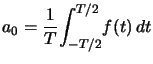

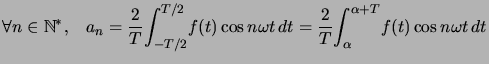

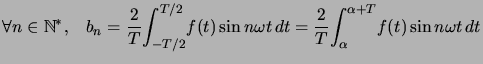

**Voir la ressource suivante pour plus de détails : [Lien](http://c.caignaert.free.fr/chapitre12/node2.html)**


### 2.2 Décomposition d'un signal carré en série de Fourier

Soit le signal carré quasi parfait d'amplitude allant de $-1$ à $+1$ et représenté dans la Figure 1 du code ci-dessous.

**`code python 5:`**

(-1.5, 1.5)

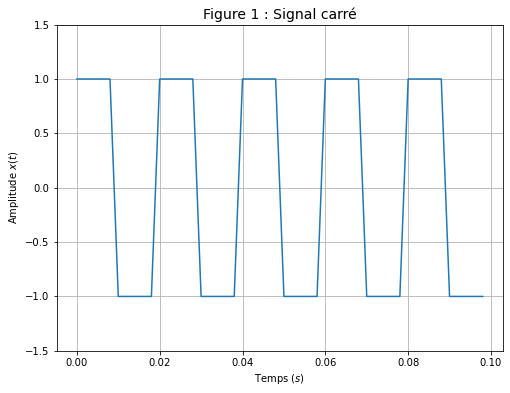

In [6]:
from scipy import signal
import numpy as np

f = 50      # Fréquence
Fe = 500    # Fréqunce d'échantillonnage 

t = np. arange(0,0.1,1/Fe)      # Création de la base temps avec arange

signal_carre = signal.square(2 * np.pi * f * t)   # Génération d'un signal carré


# Affichage du signal généré

plt.figure(figsize=(8,6))  # Créer une figure de taille 12cm x 8cm
plt.plot(t, signal_carre)
plt.grid()
plt.xlabel("Temps $(s)$ ")
plt.ylabel("Amplitude $x(t)$")
plt.title ("Figure 1 : Signal carré",fontsize=14)
plt.ylim(-1.5, 1.5)

La décomposition de Fourier d'un signal carré est donnée par la forme suivante:

#### \begin{split}signal_{carré}(t)&=  \frac{4}{\pi} \sum_{k=0}^{\infty} \frac {\sin((2k+1) 2\pi f t)}{(2k+1)} \end{split}


####  **Q14) Donner les trois premiers termes (k = 0, k = 1, k = 2) de la décomposition du signal carré.**

#### **<font color=red>Réponse :</font>** 
- ####  **<font color=red>Pour $k = 0$  \begin{split}S0=\frac{4}{\pi}\cdot{\sin(2\pi f t)} \end{split}</font>**
    
- ####  **<font color=red>Pour $k = 1$  \begin{split}S1=\frac{4}{\pi}\cdot\frac{\sin(6\pi f t)} {3} \end{split}</font>**
     
- ####  **<font color=red>Pour $k = 2$  \begin{split}S2=\frac{4}{\pi}\cdot\frac{\sin(10\pi f t)} {5} \end{split}</font>**

- ####  **<font color=red>$S = S0 + S 1 + S2 =$   \begin{split} \frac{4}{\pi}\cdot({\sin(2\pi f t)}+\frac{\sin(6\pi f t)} {3}+\frac{\sin(10\pi f t)}  {5})\end{split}</font>**

#### **Q15) Compléter et exécuter le `code python 6`. Quel est le constat par rapport au signal représenté sur la Figure 1 ? Que faudrait-il faire pour obtenir un signal carré quasi parfait ?**


#### **<font color=red>Réponse : On obtient un signal carré qui n'est pas parfait avec seulement 3 termes $(k=0, k=1, k=2)$. Il faut ajouter plus de termes (idéalement une infinité) pour se rapprocher d’un signal carré parfait comme celui de la Figure 1. L'objectif est de montrer aux étudiants une des applications de la décomposition en série de Fourier pour synthétiser un signal périodique.</font>**
    
#### **<font color=red>Il est possible pour aller plus loin de coder plus d'harmoniques sous la forme d'une boucle for :</font>**
    
```python
S = np.sin(2*np.pi*f*t)

for i in range(1,5):  # 4 harmoniques supplémentaires
    S = S + (1.0/(2*i+1))*np.sin(2*(2*i+1)*np.pi*f*t)

signal_total = (4.0/np.pi)*S
```

**`code python 6 :`**


(-1.5, 1.5)

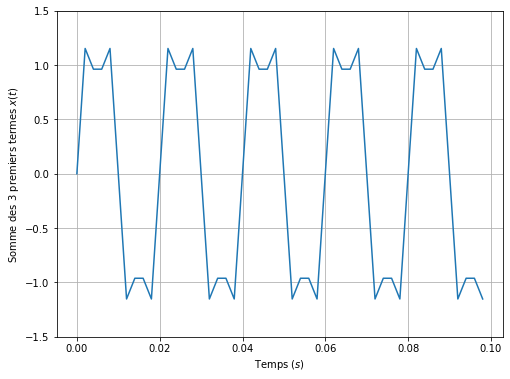

In [7]:
import numpy as np

f = 50                         # Fréquence
Fe = 500                       # Fréqunce d'échantillonnage 
t = np.arange(0,0.1,1/Fe)      # Création de la base temps avec arange

#-----------------------Partie du Code à compléter------------
# Donner les termes s0, s1 et s2 

S0 = np.sin(2*np.pi*f*t)
S1 = (1.0/3.0)*np.sin(6*np.pi*f*t)
S2 = (1.0/5.0)*np.sin(10*np.pi*f*t)

# Somme des 3 premier termes

signal_total = (4.0/np.pi)*(S0+S1+S2)

#---------------------------------------------------------------

plt.figure(figsize=(8,6))    # Créer une figure de taille 12cm x 8cm
plt.plot(t, signal_total)
plt.grid()
plt.xlabel("Temps $(s)$ ")
plt.ylabel("Somme des 3 premiers termes $x(t)$")
plt.ylim(-1.5, 1.5)



### 2.3 Transformée de Fourier

La transformée de Fourier est très utilisée pour l’analyse des signaux. Cette transformée permet de mettre en évidence des éléments d’un signal donné difficilement visualisables dans le domaine temporel.
Mathématiquement, la transformée de Fourier $X(f)$ d’un signal $x(t)$ s’exprime sous la forme :


#### \begin{split}TF(x(t))=X(f)=\int_{-\infty}^{\infty}x(t)e^{-2i\pi ft}dt\end{split}

$t$ représente le temps, $f$ représente la fréquence.

La plupart des langages de programmation intègrent des fonctionnalités pour le calcul de la transformée de Fourier via des algorithmes rapides. Ces algorithmes sont couramment nommés FFT (Fast Fourier Transform). Dans cette partie du Workshop nous allons illustrer l’intérêt de cette transformée.

En python, il est possible d’afficher le module de la transformée de Fourier d’un signal sinusoïdal en utilisant la fonction 
<a href="https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html">Periodogram</a> du module signal de `Scipy`.

Dans le **`code python 7`** ci-dessous, on représente le module de la transformée de Fourier d'un signal sinusoïdal défini par l’équation :

$x(t)=A sin (2πft)$  pour une durée $D = 0.5s$

$A = 1$ : amplitude du signal

$f = 20Hz$ : fréquence du signal

$t$ : temps en seconde



**`code python 7:`**

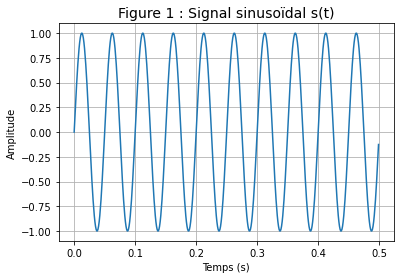

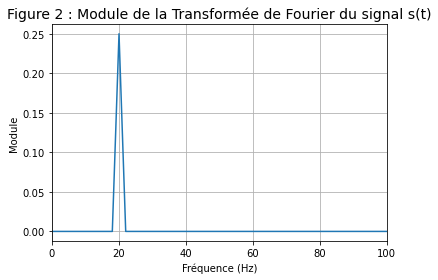

In [8]:
from scipy.signal import periodogram    # Import du module signal de scipy

f = 20                            # Fréquence du signal
Fe = 1000                         # Fréquence d'échantillonnage
D = 0.5                           # Durée du signal en seconde
t = np.arange(0, D, 1/Fe)         # Creation de la base temps avec arange

s = np.sin(2*np.pi*f*t)           # Génération d'un signal sinusoïdal de fréquence f

# Calcul de la transformée de Fourier avec la fonction periodogram

f,Pxx = periodogram(s, Fe)         

# Affichage du signal------------------------------------------------

plt.plot(t,s)                    # Affichage via la fonction plot de Matplotlib
plt.xlabel('Temps (s)')          # Définition de l'axe des abscisses
plt.ylabel('Amplitude')          # Définition de l'axe des ordonnées
plt.grid()
plt.title ('Figure 1 : Signal sinusoïdal s(t)', fontsize=14)
plt.show()                       # Affichage des courbes

# Affichage du de la transformée de Fourier du signal-----------------

plt.plot(f,Pxx)                  # Affichage via la fonction plot de Matplotlib
plt.xlabel('Fréquence (Hz)')     # Définition de l'axe des abscisses
plt.ylabel('Module')             # Définition de l'axe des ordonnées
plt.xlim(0, 100)
plt.grid()
plt.title ('Figure 2 : Module de la Transformée de Fourier du signal s(t)', fontsize=14)
plt.show()                       # Affichage des courbes



#### **Q16) Que renvoie la commande $periodogram(s,Fe)$ dans le code ci-dessus ?**
#### **<font color=red>Réponse : Cette fonction renvoie deux variables $f$ et $Pxx$ :</font>**
#### **<font color=red>     f : Tableau de fréquences d'échantillonnage.</font>**
#### **<font color=red>    Pxx : Tableau du module de la transformée de Fourier (Densité spectrale).</font>**

#### **Q17) Vérifier sur la Figure 2  (Module de la Transformée de Fourier) que la fréquence du signal est bien de $20Hz$.**
#### **<font color=red>Réponse : on voit bien sur la Figure 2 que le pic est à $20Hz$.</font>**

####  **Q18) Modifier la fréquence du signal (variable du code notée $f$) dans le `code python 7` par les valeurs ($f=5Hz, f=15Hz, f=80Hz$), puis vérifier à chaque fois que la fréquence sur le graphe est bien la même.**

####  **<font color=red>Réponse : Une fois exécuté le code pour les différentes valeurs de $f$, on voit bien sur la Figure 2 les pics à $5Hz$, $15Hz$ et $80Hz$.</font>**

####  **Q19) Pour aller plus loin : modifier la valeur de $Fe$ pour qu'elle se rapproche (puis passe en-dessous) de $2f$. Que constatez-vous ?**

####  **<font color=red>Réponse : Tant que l'on reste à une fréquence d'échantillonnage au-dessus de $2f$, il est possible d'identifier le pic. Ensuite ce n'est plus possible car trop d'informations ont été perdues.</font>**

#### **Transformée de Fourier d'une somme ou d'un produit**

On souhaite représenter la transformée de Fourier de la somme de deux signaux $S1$ et $S2$, de fréquences respectives $f1=50Hz$ et $f2=100Hz$, donnés comme suit:

- $S1(t) = 2sin(2πf_1t)$  

- $S2(t) = sin(2πf_2t)$  


#### **Q20) Compléter et exécuter le `code python 8` ci-dessous en définissant les valeurs des variables $f1$,  $f2$ et les signaux $S1$,  $S2$ et $S = S1+S2$ . Quelles sont les fréquences du signal résultant $S = S1+S2$ ?**

#### **<font color=red>Réponse : le signal $S = S1+S2$ contient deux fréquences $f1 = 50Hz$ et $f2 = 100 Hz$</font>**


#### **Q21) Refaire la question Q20) pour le cas de la multiplication des deux signaux $S1$, $S2$, et $S = S1 \times S2$.**

#### **Déduire les fréquences du signal résultant $S = S1 \times S2$ ?**
#### **<font color=red>Réponse : $S = S1 \times S2$ contient deux fréquences $50Hz$ et $150 Hz$</font>**


#### **Q22) Optionnel : vous pouvez vous amuser à choisir deux signaux S1 et S2 et vérifier le principe des ondes constructives et destructives.**

#### **<font color=red>Réponse: On peut ajouter deux signaux S1 et S2 de mêmes amplitudes mais avec des phases opposées ($S1$ avec une phase de $0$ et $S2$ avec une phase de $\pi$)</font>**

**Rappels sur les interférences des ondes**

Soit $S_1$ et $S_2$ :

$S1 = A_1\times sin(2*pi*f*t+\phi_1) $            
$S2 = A_2\times sin(2*pi*f*t+\phi_2) $    


**A) Interférence constructive**

Deux ondes interfèrent de façon constructive quand leur déphasage est un multiple de $2\pi$:

$\Delta\phi= \phi_2-\phi_1= 2k\pi$   

$k$ $\in$ $\pmb{\mathbb{Z}}$



**B) Interférence desstructive**


Deux ondes interfèrent de façon destructive quand leur déphasage est un multiple impair de $\pi$:

$\Delta\phi= \phi_2-\phi_1= (2k+1)\pi$    

$k$ $\in$ $\pmb{\mathbb{Z}}$



On a mis le cas général des deux amplitudes $A_1$ et $A_2$ qui sont différentes, mais les étudiants peuvent se contenter du cas simple $A_1= A_2$ et de jouer sur le déphasage.


**`code python 8 :`**

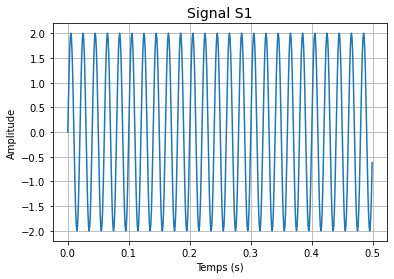

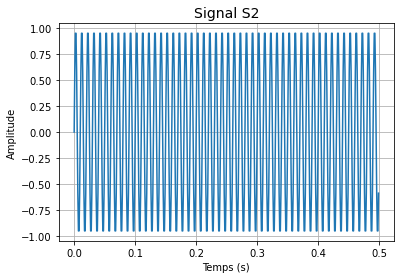

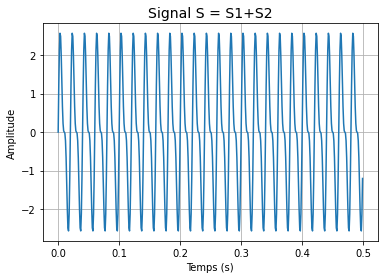

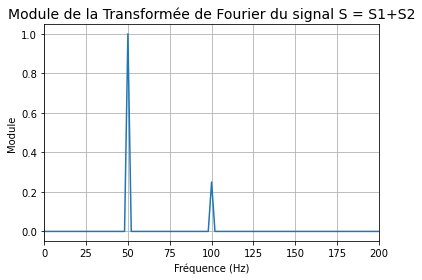

In [9]:
from scipy.signal import periodogram    # import de la fonction periodogram du module signal de scipy


Fe = 1000                          # fréquence d'échantillonnage
D = 0.5                            # durée du signal en seconde
t = np.arange(0, D, 1/Fe)          # creation de la base temps avec numpy

#-----Partie du code à compléter --------------------------------------

f1 = 50                            # fréquence du signal S1
f2 = 100                           # fréquence du signal S2


S1 = 2*np.sin(2*np.pi*f1*t)        # création d'une sinusoïde de fréquence f1
S2 = np.sin(2*np.pi*f2*t)          # création d'une sinusoïde de fréquence f2

S = S1 + S2

#------Fin de la parite du code à compléter-----------------------------


# Calcul de la transformée de Fourier avec la fonction periodogram
f,Pxx = periodogram(S,Fe)         


# Affichage du signal  S1 ------------------------------------------------
plt.figure(0)
plt.plot(t,S1)                     # affichage via la fonction plot de Matplotlib
plt.xlabel('Temps (s)')            # définition de l'axe des abscisses
plt.ylabel('Amplitude')            # définition de l'axe des ordonnées
plt.title ('Signal S1',fontsize=14)
plt.grid()
plt.show()                         # affichage des courbes

# Affichage du signal  S2 ------------------------------------------------
plt.plot(t,S2)                     # affichage via la fonction plot de Matplotlib
plt.xlabel('Temps (s)')            # définition de l'axe des abscisses
plt.ylabel('Amplitude')            # définition de l'axe des ordonnées
plt.title ('Signal S2', fontsize=14)
plt.grid()
plt.show()                         # affichage des courbes

# Affichage du signal S=S1+S2 ------------------------------------------------
plt.plot(t,S)                      # affichage via la fonction plot de Matplotlib
plt.xlabel('Temps (s)')            # définition de l'axe des abscisses
plt.ylabel('Amplitude')            # définition de l'axe des ordonnées
plt.title ('Signal S = S1+S2', fontsize=14)
plt.grid()
plt.show()                         # affichage des courbes


# Affichage du de la transformée de Fourier du signal-----------------

plt.figure(1)
plt.plot(f,Pxx)                    # affichage via la fonction plot de Matplotlib
plt.xlabel('Fréquence (Hz)')       # définition de l'axe des abscisses
plt.ylabel('Module')               # définition de l'axe des ordonnées
plt.xlim(0, 200)
plt.grid()
plt.title ('Module de la Transformée de Fourier du signal S = S1+S2', fontsize=14)
plt.show()                         # affichage des courbes

## 3. Filtrage d'un signal:

Une des applications de la Transformée de Fourier est le filtrage des signaux. Dans cette partie du workshop on réalise le filtrage d'un signal en suivant les étapes suivantes :

1. **On calcule d'abord la transformée de Fourier du signal à filtrer.**

2. **On choisit la fréquence de coupure du filtre.**

3. **On applique cette fréquence de coupure sur le signal obtenu de la transformée de Fourier.**

4. **On applique la transformée de Fourier inverse sur le signal filtré et on affiche le résultat du signal filtré.**


### 3.1 Application

#### Etape1: 

Dans `code python 9` on calcule et on trace la transformée de Fourier de la somme de deux signaux $𝑆_1$ 𝑒𝑡 $𝑆_2$, sachant que les signaux $𝑆_1$ et $𝑆_2$ ont des fréquences respectives $𝑓_1 = 50𝐻𝑧$  et  $𝑓_2 = 100𝐻𝑧$. 

$𝑆_1$ et $𝑆_2$ sont donnés comme suit :

$𝑆_1(𝑡)=2𝑠𝑖𝑛(2π𝑓_1 𝑡)$  

$f_1=50Hz$

$𝑆_2(𝑡)=𝑠𝑖𝑛(2π𝑓_2 𝑡)$ 

$f_2=100Hz$



**`code python 9 :`**

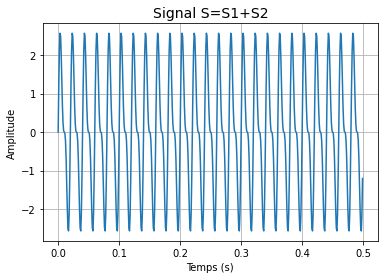

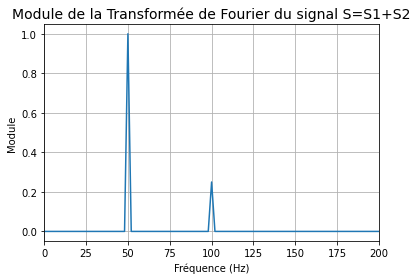

In [10]:
from scipy.signal import periodogram    # import de la fonction periodogram du module signal de scipy

Fe = 1000                            # fréquence d'échantillonnage
D = 0.5                              # durée du signal en seconde
t = np.arange(0, D, 1/Fe)            # création de la base temps avec arange
f1 = 50                              # fréquence du signal S1
f2 = 100                             # fréquence du signal S2


# S1 et S2 et S=S1+S2
S1 = 2*np.sin(2*np.pi*f1*t)          # création d'une sinusoïde de fréquence f1
S2 = np.sin(2*np.pi*f2*t)            # création d'une sinusoïde de fréquence f2
S = S1 + S2


# calcul de la transformée de Fourier avec la fonction periodogram

f,FFT = periodogram(S,Fe)           # f: vecteur des fréquences et FFT:la transformée de Fourier du signal S=S1=S2


# Affichage du signal------------------------------------------------

plt.plot(t,S)                       # affichage via la fonction plot de Matplotlib
plt.xlabel('Temps (s)')             # définition de l'axe des abscisses
plt.ylabel('Amplitude')             # définition de l'axe des ordonnées
plt.title ('Signal S=S1+S2',fontsize=14)
plt.grid()
plt.show()                          # affichage des courbes


# Affichage du de la transformée de Fourier FFT du signal S=S1+S2-----------------

plt.plot(f,FFT)                     # affichage via la fonction plot de Matplotlib
plt.xlabel('Fréquence (Hz)')        # définition de l'axe des abscisses
plt.ylabel('Module')                # définition de l'axe des ordonnées
plt.xlim(0, 200)
plt.grid()
plt.title ('Module de la Transformée de Fourier du signal S=S1+S2',fontsize=14)
plt.show()                          # affichage des courbes


#### Etape2 : On choisit la fréquence de coupure du filtre & on applique cette fréquence de coupure sur le signal obtenu de la transformée de Fourier.

In [11]:

# définir la fréquence de coupure fc du filtre à 75 Hz

fc = 75

# on définit une variable qui reçoit le signal filtré de la même taille que la transformée de Fourier (FFT)

FFT_filtre = FFT

# on réalise un filre passe bas comme suit :

for i in range(len(f)):
    if f[i] > fc: # on coupe toutes les fréquences > 75 Hz 
        FFT_filtre[i] = 0.0
         


#### Etape3 et Etape 4 : On applique la transformée de Fourier inverse sur le signal filtré et on affiche le résultat du signal après filtrage.


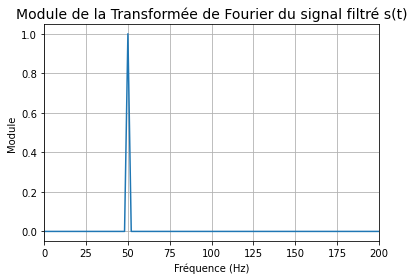

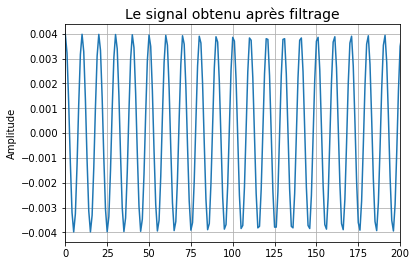

In [12]:

# on calcule la transfomrée de Fourier inverse du signal après filtrage en utilsant la fonction ifft de Python
# la FFT inverse permet de revenir dans l'espace temporal (espace fréquentiel -> espace temps)

FFT_inverse = np.fft.ifft(FFT_filtre)

# attention le résulat est un nombre complexe
# on ne doit donc représenter que la partie réelle, imaginaire ou le module (réél^2 + imag^2)

plt.plot(f,FFT_filtre)                # affichage via la fonction plot de Matplotlib
plt.xlabel('Fréquence (Hz)')          # définition de l'axe des abscisses
plt.ylabel('Module')                  # définition de l'axe des ordonnées
plt.xlim(0, 200)
plt.grid()
plt.title ('Module de la Transformée de Fourier du signal filtré s(t)',fontsize=14)
plt.show()  

plt.plot(np.real(FFT_inverse))         # affichage via la fonction plot de Matplotlib de la partie réelle
plt.ylabel('Amplitude')                # définition de l'axe des ordonnées
plt.xlim(0, 200)
plt.grid()
plt.title ('Le signal obtenu après filtrage',fontsize=14)
plt.show()          

####  **Q23) Quel est le constat sur les signaux obtenus après filtrage ?**
#### **<font color=red>Réponse : On a réussi à faire un filtre numérique passe bas avec une fréquence de coupure $fc=75Hz$, ce qui a pour effet de supprimer la fréquence $100Hz$ et de ne garder que la fréquence $50Hz$ du signal d'origine.</font>**


#### **Q24) Refaire les étapes 1 à 4 pour réaliser un filtre passe haut.**

#### **<font color=red>Réponse : Il suffit de changer le code python du filtrage passe bas en remplaçant $(>fc)$ par $(<fc)$ pour ne garder que les hautes fréquences.</font>**

```python 
for i in range(len(f)):
    if f[i] < fc: # on coupe toutes les fréquences < 75 Hz 
        FFT_filtre[i] = 0.0 
```



## Ressources pour aller plus loin dans la partie filtrage

Il n'est pas possible de réaliser un filtre numérique sur un signal présentant de nombreuses fréquences (signal complexe ou signal bruité par exemple) en utilisant une approche aussi simple. Pour réaliser des filtres numériques passe-bas, passe-haut ou passe bande de ce type, vous pouvez consulter les ressources suivantes qui utilisent les filtres de [Butterworth](https://en.wikipedia.org/wiki/Butterworth_filter) :

1. [Filtre de Butterworth avec Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)

2. [Comment concevoir un filtre numérique](https://www.f-legrand.fr/scidoc/docmml/numerique/filtre/filtrenum/filtrenum.html)

3. [Exemples de codes python](https://www.programcreek.com/python/example/59508/scipy.signal.butter)
